# Recap - The Cars Dataset

In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

# 🚗 The Cars dataset

👇 Run the code down below to import the [***ML_Cars_Recap_dataset.csv dataset***](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv) - _this version is slightly different from the one in the challenge 3._

In [2]:
aws_url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv"
cars = pd.read_csv(aws_url)
cars.head()


# Note: It is a common practice to store csv online. This one is stored on the AWS account of LeWagon

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [3]:
cars.shape # 205 cars x 8 features

(205, 8)

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

❓ **Question (Information)** ❓ Collect some basic information about your dataset.

In [5]:
#numerical information
cars.describe()

,carwidth,curbweight,stroke,peakrpm
count,205.000000,205.000000,205.000000,205.000000
mean,65.887940,2555.565854,3.255415,5125.121951
std,2.074414,520.680204,0.313597,476.985643
min,60.300000,1488.000000,2.070000,4150.000000
25%,64.200000,2145.000000,3.110000,4800.000000
50%,65.500000,2414.000000,3.290000,5200.000000
75%,66.500000,2935.000000,3.410000,5500.000000
max,72.300000,4066.000000,4.170000,6600.000000


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    float64
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    object 
 5   stroke          205 non-null    float64
 6   peakrpm         205 non-null    float64
 7   price           205 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.9+ KB


In [11]:
cars.dtypes

aspiration         object
carwidth          float64
curbweight        float64
enginetype         object
cylindernumber     object
stroke            float64
peakrpm           float64
price              object
dtype: object

In [12]:
cars.isnull().sum()

aspiration        0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

# (1) 🛠 Data preparation

## (1.0) Pre-requisites

❓ **Question (Potential anomalies)** ❓ 

- Are there columns which need to be modified because of their data types? 
    - Please proceed accordingly.

### Cylinder Number

In [13]:
cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
cylinder_dict= {'four':4,
                'five':5,
                'six':6,
                'three':3,
                'twelve':12,
                'two':2,
                'eight':8}

In [15]:
cars.cylindernumber = cars.cylindernumber.map(cylinder_dict)
cars.head(10)

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
5,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive
6,std,71.40000,2844.0,ohc,5,3.40,5500.0,expensive
7,std,65.88794,2954.0,ohc,5,3.40,5500.0,expensive
8,turbo,71.40000,3086.0,ohc,5,3.40,5500.0,expensive
9,turbo,67.90000,3053.0,ohc,5,3.40,5500.0,expensive


## (1.1) Duplicates

❓ **Question (Duplicated rows)** ❓ 

Compute the number of duplicated rows that the cars dataset has.

In [18]:
cars.duplicated().sum()

14

In [19]:
len(cars)

205

In [30]:
cars.drop_duplicates(inplace=True)
cars.reset_index(inplace=True)

In [40]:
cars.drop(columns=['index'], inplace=True)

In [41]:
len(cars)

191

In [42]:
cars

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
2,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
3,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
4,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive
...,...,...,...,...,...,...,...,...
186,std,68.90000,2952.0,ohc,4,3.15,5400.0,expensive
187,turbo,68.80000,3049.0,ohc,4,3.15,5300.0,expensive
188,std,68.90000,3012.0,ohcv,6,2.87,5500.0,expensive
189,turbo,68.90000,3217.0,ohc,6,3.40,4800.0,expensive


❓ **Question (Remove duplicates)** ❓ 

## (1.2) Missing data

❓ **Question (`NaN`)** ❓ 

What is the percentage of `NaN` for each feature?

In [43]:
cars.isna().sum()

aspiration        0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

<details>
    <summary><i>Answer</i></summary>
    
😇 It is a miracle but we do not have missing values here. You can move to the next section of this notebook :) 
    
</details>

## (1.3) Defining the features $X$ and the target $y$

❓ **Question** ❓

- Store the features of this dataset in a variable $X$
- Store the target in a variable $y$.

In [44]:
X=cars.drop(columns=['price'])
X

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,64.10000,2548.0,dohc,4,2.68,5000.0
1,std,65.50000,2823.0,ohcv,6,3.47,5000.0
2,std,65.88794,2337.0,ohc,4,3.40,5500.0
3,std,66.40000,2824.0,ohc,5,3.40,5500.0
4,std,66.30000,2507.0,ohc,5,3.40,5500.0
...,...,...,...,...,...,...,...
186,std,68.90000,2952.0,ohc,4,3.15,5400.0
187,turbo,68.80000,3049.0,ohc,4,3.15,5300.0
188,std,68.90000,3012.0,ohcv,6,2.87,5500.0
189,turbo,68.90000,3217.0,ohc,6,3.40,4800.0


In [45]:
y=cars.price
y

0      expensive
1      expensive
2      expensive
3      expensive
4      expensive
         ...    
186    expensive
187    expensive
188    expensive
189    expensive
190    expensive
Name: price, Length: 191, dtype: object

❓ **Question (Quick look at the target)** ❓ What is the proportion of "cheap" cars vs. "expensive" cars ? 

In [46]:
y.value_counts(normalize=True)

expensive    0.612565
cheap        0.387435
Name: price, dtype: float64

## (1.4) Scaling numerical features

❓ **Question (quick glance at the numerical columns)** ❓

- Show the boxplots of all the numerical columns in one line of code
- Do the same with their distributions using histograms

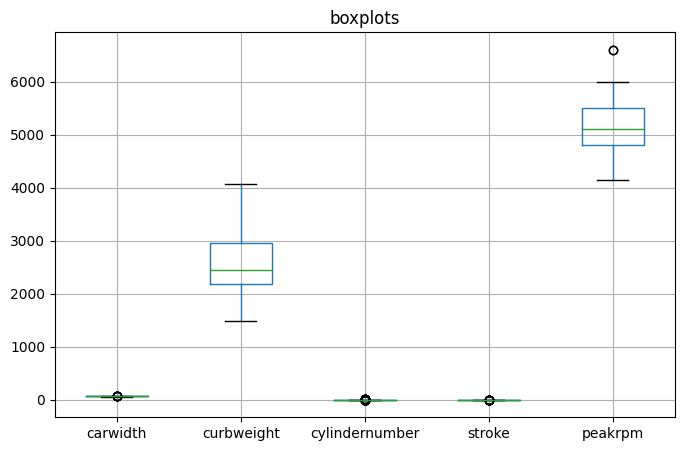

In [84]:
ax=cars.boxplot(figsize=(8,5))
ax.set_title('boxplots')
plt.show()

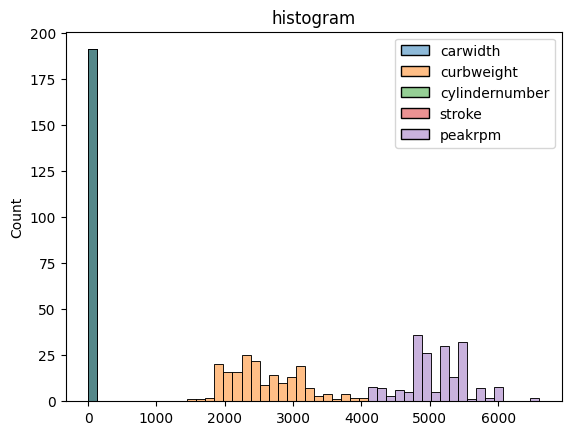

In [82]:
ax_2 = sns.histplot(cars_num, bins=50)
ax_2.set_title('histogram')
plt.show()

❓ **Question (Focus on the numerical columns)** ❓

Store the numerical columns of the cars dataset into `cars_num`.

In [72]:
###########################
# Manual solution         # - not very smart
###########################

# num_features = ["carwidth", "curbweight", "cylindernumber", "stroke", "peakrpm"]
# cars_num = X[num_features]

# That is one way to select the numerical features...
# But not very smart...

###########################
# Elegant solution        # - much better
###########################

cars_num = X.select_dtypes(exclude = ['object']) # selecting only the numerical features
cars_num

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,64.10000,2548.0,4,2.68,5000.0
1,65.50000,2823.0,6,3.47,5000.0
2,65.88794,2337.0,4,3.40,5500.0
3,66.40000,2824.0,5,3.40,5500.0
4,66.30000,2507.0,5,3.40,5500.0
...,...,...,...,...,...
186,68.90000,2952.0,4,3.15,5400.0
187,68.80000,3049.0,4,3.15,5300.0
188,68.90000,3012.0,6,2.87,5500.0
189,68.90000,3217.0,6,3.40,4800.0


❓ **Question (Robust Scaler)** ❓

👨🏻‍🏫 Robust Scaling all the numerical features is a quick and efficient way of scaling.

In [85]:
# Instantiating a RobustScaler
robust_scaler = RobustScaler()

# Creating a copy of the original numerical features 
cars_num_scaled = cars_num.copy()

# Scaling the features and storing them in the copy
cars_num_scaled = pd.DataFrame(robust_scaler.fit_transform(cars_num_scaled),
                               columns = cars_num.columns)

# Showing the scaled features
cars_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.296296,0.492248,1.0,0.366667,0.571429
4,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.185185,0.782946,0.0,-0.466667,0.285714
188,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.222222,1.000000,2.0,0.366667,-0.428571


## (1.5) Encoding categorical features

❓ **Question (Focus on the categorical columns)** ❓

Store the categorical columns of the cars dataset into `cars_categorical`.

In [86]:
# Manual solution --> not very smart

# categorical_features = ["aspiration", "enginetype"]
# cars_categorical = X[categorical_features]

# Elegant solution --> much better
cars_categorical = X.select_dtypes(include = ['object']) # selecting only the categorical features
cars_categorical

,aspiration,enginetype
0,std,dohc
1,std,ohcv
2,std,ohc
3,std,ohc
4,std,ohc
...,...,...
186,std,ohc
187,turbo,ohc
188,std,ohcv
189,turbo,ohc


❓ **Question: What is the expected number of columns generated if we encode the categorical features** ❓

In [91]:
len(cars_categorical.aspiration.unique())+len(cars_categorical.enginetype.unique())

9

The aspiration column has only two values, we could encode it only with one column, whereas engine type has 7 different values, this leaves us with 8 new columns

❓ **Question (OneHotEncoder): Encode the categorical features** ❓

<details>
    <summary><i>Hints</i></summary>
    
- Drop a column when a categorical feature is binary
- Use full matrixes (Sklearn estimators don't understand sparse matrixes)
- Store them into a Pandas DataFrame called `encoded_features`
    - 💡 Once that the OHE is fitted to a DataFrame, the new columns' names are accessible through _`get_features_names_out()`_
    
</details>

### Encode Aspiration

In [94]:
#instantiate
ohe_1 = OneHotEncoder(drop='if_binary', sparse=False)
#fit
ohe_1.fit(cars_categorical[['aspiration']])
#transform
cars_categorical[ohe_1.get_feature_names_out()] = ohe_1.transform(cars_categorical[['aspiration']])


In [95]:
cars_categorical.head()

,aspiration,enginetype,aspiration_turbo
0,std,dohc,0.0
1,std,ohcv,0.0
2,std,ohc,0.0
3,std,ohc,0.0
4,std,ohc,0.0


### Encode Engine Type

In [96]:
ohe_2 = OneHotEncoder(sparse=False)
ohe_2.fit(cars_categorical[['enginetype']])
cars_categorical[ohe_2.get_feature_names_out()] = ohe_2.transform(cars_categorical[['enginetype']])

In [98]:
cars_categorical_encoded = cars_categorical.drop(columns=['aspiration', 'enginetype'])

In [99]:
cars_categorical_encoded.head()

,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.6) Concatenating all the preprocessed features together $X_{preprocessed}$

❓ **Question (aggregating all the preprocessed features together)** ❓

Concatenate `cars_num_scaled` and `cars_categorical` into `X_preprocessed`

In [100]:
cars_num_scaled.shape

(191, 5)

In [103]:
cars_categorical_encoded.shape

(191, 8)

In [117]:
X_preprocessed = pd.concat([cars_num_scaled, cars_categorical_encoded], axis=1)

In [118]:
X_preprocessed

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,-0.555556,0.135659,0.0,-2.033333,-0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.037037,0.490956,2.0,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.106644,-0.136951,0.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.296296,0.492248,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.259259,0.082687,1.0,0.366667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.185185,0.782946,0.0,-0.466667,0.285714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,1.222222,0.735142,2.0,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.222222,1.000000,2.0,0.366667,-0.428571,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.7) Encoding the target

❓ **Question (Encoding the categorical target)** ❓

Encode the target using 📚[***LabelEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [125]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
(y_encoded)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [134]:
targets= pd.DataFrame({'y':y, 'y_encoded':y_encoded})
targets

,y,y_encoded
0,expensive,1
1,expensive,1
2,expensive,1
3,expensive,1
4,expensive,1
...,...,...
186,expensive,1
187,expensive,1
188,expensive,1
189,expensive,1


# (2) 🏋🏻‍♂️ Modeling (Logistic Regression)

🎯 Our goal is to predict whether a car will be expensive or cheap based on some features.

## (2.0) Cross-Validation

👩‍🏫 In Machine Learning, when you want to compare different models, a Cross Validation is a robust method to roughly assess the performance of each individual submodel.

❓ **Question (CrossValidation)** ❓

What is the potential performance of a LogisticRegression for this dataset?

In [136]:
cv_results = cross_validate(LogisticRegression(), X=X_preprocessed, y=y_encoded, cv=5)
result = cv_results['test_score'].mean()
result

0.9004048582995952

- 🚀 This accuracy is promising, let's go further !
- 🗣 We will discuss what is a good Regression/Classification model in the `Performance Metrics` unit.

## (2.1) Holdout Method

❓ **Question (Holdout): train/test split your dataset with a 70/30 ratio** ❓

<details>
    <summary><i>Hint</i></summary>

- For a binary target, you actually don't have to use to `LabelEncoder`.
    - Sklearn is smart enough to detect a binary target.
    
</details>

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y_encoded, test_size=0.3)

## (2.2) Training and evaluating

❓ **Question: Train/Evaluate a Logistic Regression model** ❓

In [138]:
# Instantiate a Logistic Regression model
logreg = LogisticRegression(max_iter = 100)

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model
logreg.score(X_test, y_test)

0.896551724137931

## (2.3) Predicting

❓ **Question (Predicting a new "point")**❓

Does your ML algorithm (the Logistic Regression you've just trained) think that a car with the following features will be expensive? 

In [165]:
new_car = pd.DataFrame(columns = X.columns)
new_car.loc[0] = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


> 👨🏻‍🏫 **To make a prediction, this new car has to be through the same transformations as the ones performed in the training set!**

🌠 Have a look at the big picture of this recap [here](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/prepare_dataset_fit_transform.png)!

In [166]:
# 0 - Fixing abnormal data

new_car.cylindernumber = new_car.cylindernumber.map(cylinder_dict)
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,4,3.11,5400.0


In [169]:
# 1 - Scaling the numerical features

num_feat = new_car.select_dtypes(exclude='object')
num_feat_transf = robust_scaler.transform(num_feat)
num_feat_transf = pd.DataFrame(num_feat_transf, columns=num_feat.columns)
num_feat_transf

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,0.106644,-0.735142,0.0,-0.6,0.428571


In [175]:
# 2 - Encoding the categorical feature

cat_feat = new_car.select_dtypes(include='object')
cat_feat['aspiration'] = ohe_1.transform(cat_feat[['aspiration']])
cat_feat[ohe_2.get_feature_names_out()] = ohe_2.transform(cat_feat[['enginetype']])
cat_feat.drop(columns=['enginetype'], inplace=True)
cat_feat

,aspiration,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [182]:
# 3 - Aggregating the numerical features and categorical features together

new_car_transf = pd.concat([num_feat_transf, cat_feat], axis=1)
new_car_transf.columns
new_car_transf.rename(columns={'aspiration': 'aspiration_turbo'}, inplace=True)
new_car_transf

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.106644,-0.735142,0.0,-0.6,0.428571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [183]:
targets.head()

,y,y_encoded
0,expensive,1
1,expensive,1
2,expensive,1
3,expensive,1
4,expensive,1


In [184]:
# 4 - Prediction

logreg.predict(new_car_transf)

array([0])

# (3) 🧑🏿‍🏫 Warning about Data Leakage

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/cross_validation_data_leakage.png"  width=600 height=300>

🏁 Congratulations! You are an expert at preparing a dataset now !

🧑🏻‍🏫 Don't forget your flashcards and see you for the next section: `Performance Metrics`!